# COGS 108 - EDA Checkpoint

# Names


- Dominic Chua
- Brandon Chen
- Anna Morozova
- Taha Alam
- Yvonne Liu

<a id='research_question'></a>
# Research Question

*In the past 10 years is there a correlation to how recent precipitation (3 days prior) modulates the risk for car accidents in the state of California (comparing North and South California)?*

# Setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(font_scale=1, style="white")

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
plt.rcParams['figure.figsize'] = (12, 5)

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 104)

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

# Data Cleaning

Import all data from GitHub. DataFrames will use the following abbrieviations for cities:
- BF: Bakersfield
- PS: Palm Springs
- SD: San Diego
- SAC: Sacramento
- SJ: San Jose
- ST: Stockton

In [2]:
collision_headers = ["CASE_ID","ACCIDENT_YEAR","PROC_DATE","JURIS","COLLISION_DATE","COLLISION_TIME","OFFICER_ID","REPORTING_DISTRICT","DAY_OF_WEEK","CHP_SHIFT","POPULATION","CNTY_CITY_LOC","SPECIAL_COND","BEAT_TYPE","CHP_BEAT_TYPE","CITY_DIVISION_LAPD","CHP_BEAT_CLASS","BEAT_NUMBER","PRIMARY_RD","SECONDARY_RD","DISTANCE","DIRECTION","INTERSECTION","WEATHER_1","WEATHER_2","STATE_HWY_IND","CALTRANS_COUNTY","CALTRANS_DISTRICT","STATE_ROUTE","ROUTE_SUFFIX","POSTMILE_PREFIX","POSTMILE","LOCATION_TYPE","RAMP_INTERSECTION","SIDE_OF_HWY","TOW_AWAY","COLLISION_SEVERITY","NUMBER_KILLED","NUMBER_INJURED","PARTY_COUNT","PRIMARY_COLL_FACTOR","PCF_CODE_OF_VIOL","PCF_VIOL_CATEGORY","PCF_VIOLATION","PCF_VIOL_SUBSECTION","HIT_AND_RUN","TYPE_OF_COLLISION","MVIW","PED_ACTION","ROAD_SURFACE","ROAD_COND_1","ROAD_COND_2","LIGHTING","CONTROL_DEVICE","CHP_ROAD_TYPE","PEDESTRIAN_ACCIDENT","BICYCLE_ACCIDENT","MOTORCYCLE_ACCIDENT","TRUCK_ACCIDENT","NOT_PRIVATE_PROPERTY","ALCOHOL_INVOLVED","STWD_VEHTYPE_AT_FAULT","CHP_VEHTYPE_AT_FAULT","COUNT_SEVERE_INJ","COUNT_VISIBLE_INJ","COUNT_COMPLAINT_PAIN","COUNT_PED_KILLED","COUNT_PED_INJURED","COUNT_BICYCLIST_KILLED","COUNT_BICYCLIST_INJURED","COUNT_MC_KILLED","COUNT_MC_INJURED","PRIMARY_RAMP","SECONDARY_RAMP"]

#import of all city data

#Bakersfield Data 
BF_2011_weather = pd.read_csv("https://raw.githubusercontent.com/DeusSeos/Precipitation-Car-Crash-Datasets/main/Bakersfield/2011-2015-BF.csv")
BF_2016_weather = pd.read_csv("https://raw.githubusercontent.com/DeusSeos/Precipitation-Car-Crash-Datasets/main/Bakersfield/2016-2021-BF.csv")
BF_weather = pd.concat([BF_2011_weather, BF_2016_weather])
BF_collision = pd.read_csv("https://raw.githubusercontent.com/DeusSeos/Precipitation-Car-Crash-Datasets/main/Bakersfield/2011-2021CollisionRecords.txt", names=collision_headers)

#Palm springs data
PS_2011_weather = pd.read_csv("https://raw.githubusercontent.com/DeusSeos/Precipitation-Car-Crash-Datasets/main/Palm-Springs/2011-2015-PS.csv")
PS_2016_weather = pd.read_csv("https://raw.githubusercontent.com/DeusSeos/Precipitation-Car-Crash-Datasets/main/Palm-Springs/2016-2021-PS.csv")
PS_weather = pd.concat([PS_2011_weather, PS_2016_weather])
PS_collision = pd.read_csv("https://raw.githubusercontent.com/DeusSeos/Precipitation-Car-Crash-Datasets/main/Palm-Springs/2011-2021CollisionRecords.txt", names=collision_headers)

#Sacramento data
SAC_2011_weather = pd.read_csv("https://raw.githubusercontent.com/DeusSeos/Precipitation-Car-Crash-Datasets/main/Sacramento/2011-2015-SAC.csv")
SAC_2016_weather = pd.read_csv("https://raw.githubusercontent.com/DeusSeos/Precipitation-Car-Crash-Datasets/main/Sacramento/2016-2021-SAC.csv")
SAC_weather = pd.concat([SAC_2011_weather, SAC_2016_weather])
SAC_collision = pd.read_csv("https://raw.githubusercontent.com/DeusSeos/Precipitation-Car-Crash-Datasets/main/Sacramento/2011-2021CollisionRecords.txt", names=collision_headers)

#San Diego
SD_2011_weather = pd.read_csv("https://raw.githubusercontent.com/DeusSeos/Precipitation-Car-Crash-Datasets/main/San-Diego/2011-2015-SD.csv")
SD_2016_weather = pd.read_csv("https://raw.githubusercontent.com/DeusSeos/Precipitation-Car-Crash-Datasets/main/San-Diego/2016-2021-SD.csv")
SD_weather = pd.concat([SD_2011_weather, SD_2016_weather])
SD_collision = pd.read_csv("https://raw.githubusercontent.com/DeusSeos/Precipitation-Car-Crash-Datasets/main/San-Diego/2011-2021CollisionRecords.txt", names=collision_headers)

#San Jose
SJ_2011_weather = pd.read_csv("https://raw.githubusercontent.com/DeusSeos/Precipitation-Car-Crash-Datasets/main/San-Jose/2011-2015-SJ.csv")
SJ_2016_weather = pd.read_csv("https://raw.githubusercontent.com/DeusSeos/Precipitation-Car-Crash-Datasets/main/San-Jose/2016-2021-SJ.csv")
SJ_weather = pd.concat([SJ_2011_weather, SJ_2016_weather])
SJ_collision = pd.read_csv("https://raw.githubusercontent.com/DeusSeos/Precipitation-Car-Crash-Datasets/main/San-Jose/2011-2021CollisionRecords.txt", names=collision_headers)

#Stockton
ST_2011_weather = pd.read_csv("https://raw.githubusercontent.com/DeusSeos/Precipitation-Car-Crash-Datasets/main/Stockton/2011-2015-ST.csv")
ST_2016_weather = pd.read_csv("https://raw.githubusercontent.com/DeusSeos/Precipitation-Car-Crash-Datasets/main/Stockton/2016-2021-ST.csv")
ST_weather = pd.concat([ST_2011_weather, ST_2016_weather])
ST_collision = pd.read_csv("https://raw.githubusercontent.com/DeusSeos/Precipitation-Car-Crash-Datasets/main/Stockton/2011-2021CollisionRecords.txt", names=collision_headers)

Let's take a look at the current states of a few of our dataframes:

In [3]:
ST_weather.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
0,US1CASJ0003,"STOCKTON 2.1 NW, CA US",2011-01-01,NaN,NaN,0.18,NaN,NaN
1,US1CASJ0003,"STOCKTON 2.1 NW, CA US",2011-01-02,NaN,NaN,0.20,NaN,NaN
2,US1CASJ0003,"STOCKTON 2.1 NW, CA US",2011-01-03,NaN,NaN,0.19,NaN,NaN
3,US1CASJ0003,"STOCKTON 2.1 NW, CA US",2011-01-04,NaN,NaN,0.00,0.0,NaN
4,US1CASJ0003,"STOCKTON 2.1 NW, CA US",2011-01-05,NaN,NaN,0.02,NaN,NaN


In [4]:
ST_collision.head()

,CASE_ID,ACCIDENT_YEAR,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,POPULATION,CNTY_CITY_LOC,SPECIAL_COND,BEAT_TYPE,CHP_BEAT_TYPE,CITY_DIVISION_LAPD,CHP_BEAT_CLASS,BEAT_NUMBER,PRIMARY_RD,SECONDARY_RD,DISTANCE,DIRECTION,INTERSECTION,WEATHER_1,WEATHER_2,STATE_HWY_IND,CALTRANS_COUNTY,CALTRANS_DISTRICT,STATE_ROUTE,ROUTE_SUFFIX,POSTMILE_PREFIX,POSTMILE,LOCATION_TYPE,RAMP_INTERSECTION,SIDE_OF_HWY,TOW_AWAY,COLLISION_SEVERITY,NUMBER_KILLED,NUMBER_INJURED,PARTY_COUNT,PRIMARY_COLL_FACTOR,PCF_CODE_OF_VIOL,PCF_VIOL_CATEGORY,PCF_VIOLATION,PCF_VIOL_SUBSECTION,HIT_AND_RUN,TYPE_OF_COLLISION,MVIW,PED_ACTION,ROAD_SURFACE,ROAD_COND_1,ROAD_COND_2,LIGHTING,CONTROL_DEVICE,CHP_ROAD_TYPE,PEDESTRIAN_ACCIDENT,BICYCLE_ACCIDENT,MOTORCYCLE_ACCIDENT,TRUCK_ACCIDENT,NOT_PRIVATE_PROPERTY,ALCOHOL_INVOLVED,STWD_VEHTYPE_AT_FAULT,CHP_VEHTYPE_AT_FAULT,COUNT_SEVERE_INJ,COUNT_VISIBLE_INJ,COUNT_COMPLAINT_PAIN,COUNT_PED_KILLED,COUNT_PED_INJURED,COUNT_BICYCLIST_KILLED,COUNT_BICYCLIST_INJURED,COUNT_MC_KILLED,COUNT_MC_INJURED,PRIMARY_RAMP,SECONDARY_RAMP
0,4752440,2011,20121002,9265,20110403,1448,13919,NaN,7,2,6,3905,0,1,3,NaN,1,042,RT 4,WILSON WY,100.0,W,N,A,-,Y,SJ,10.0,4.0,-,R,17.45,H,-,E,Y,3,0,1,1,A,-,03,22350.0,NaN,N,E,I,A,A,H,-,A,D,0,NaN,NaN,NaN,NaN,Y,NaN,A,01,0,1,0,0,0,0,0,0,0,TO,-
1,4752480,2011,20121010,9265,20110404,1840,015156,NaN,1,2,6,3905,0,1,3,NaN,2,003,RT 99,RT 4,1056.0,S,N,A,-,Y,SJ,10.0,99.0,-,-,18.51,H,-,N,N,0,0,0,2,A,-,07,21658.0,A,N,B,C,A,A,H,-,A,D,1,NaN,NaN,NaN,NaN,Y,NaN,A,01,0,0,0,0,0,0,0,0,0,-,-
2,4753441,2011,20120411,3905,20110216,1745,2072,CIV,3,5,6,3905,0,0,0,NaN,0,0FO,PACIFIC AV,KNOLES,0.0,NaN,Y,B,-,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,3,0,2,2,A,-,09,21801.0,A,N,D,C,A,B,H,-,C,A,0,NaN,NaN,NaN,NaN,Y,NaN,A,01,0,1,1,0,0,0,0,0,0,-,-
3,4753442,2011,20120411,3905,20110218,1604,2277,LAK,5,5,6,3905,0,0,0,NaN,0,NaN,EDAN AV,PACIFIC AV E FR RD,0.0,NaN,Y,C,-,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,4,0,1,2,A,-,09,21802.0,A,N,D,C,A,B,H,-,A,A,0,NaN,NaN,NaN,NaN,Y,NaN,A,01,0,0,1,0,0,0,0,0,0,-,-
4,4753445,2011,20120411,3905,20110223,854,1323,LAK,3,5,6,3905,0,0,0,NaN,0,NaN,BURKE BRADLEY DR,PERSHING AV,41.0,E,N,A,-,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0,1,2,A,-,03,22350.0,NaN,N,C,G,A,A,H,-,A,D,0,NaN,Y,NaN,NaN,Y,NaN,A,01,0,1,0,0,0,0,1,0,0,-,-


Here we create the functions to clean each dataframe. There are two functions used to clean the two types of dataframes:
<br>
<br>
`clean_collision_data` - cleans the dataframes containing collision data
* removes all columns except the date and the weather type of that day
* renames the collision date column to `DATE` and weather type column to `WEATHER`
* changes the dates in the `DATE` column to pandas `datetime` objects
* relabels the weather type in the `WEATHER` column to actual weather patterns instead of just letters
<br>
<br>

`clean_weather_data` - cleans the dataframes containing weather data
* drops all columns except the `DATE` and `PRCP` columns
* changes the dates in the `DATE` column to pandas `datetime` objects

In [5]:
## Drop all columns in the dataframe that are not needed

def clean_collision_data(df):
    df = df.drop(["CASE_ID","ACCIDENT_YEAR","PROC_DATE","JURIS","COLLISION_TIME","OFFICER_ID","REPORTING_DISTRICT","DAY_OF_WEEK","CHP_SHIFT","POPULATION","CNTY_CITY_LOC","SPECIAL_COND","BEAT_TYPE","CHP_BEAT_TYPE","CITY_DIVISION_LAPD","CHP_BEAT_CLASS","BEAT_NUMBER","PRIMARY_RD","SECONDARY_RD","DISTANCE","DIRECTION","INTERSECTION","WEATHER_2","STATE_HWY_IND","CALTRANS_COUNTY","CALTRANS_DISTRICT","STATE_ROUTE","ROUTE_SUFFIX","POSTMILE_PREFIX","POSTMILE","LOCATION_TYPE","RAMP_INTERSECTION","SIDE_OF_HWY","TOW_AWAY","COLLISION_SEVERITY","NUMBER_KILLED","NUMBER_INJURED","PARTY_COUNT","PRIMARY_COLL_FACTOR","PCF_CODE_OF_VIOL","PCF_VIOL_CATEGORY","PCF_VIOLATION","PCF_VIOL_SUBSECTION","HIT_AND_RUN","TYPE_OF_COLLISION","MVIW","PED_ACTION","ROAD_SURFACE","ROAD_COND_1","ROAD_COND_2","LIGHTING","CONTROL_DEVICE","CHP_ROAD_TYPE","PEDESTRIAN_ACCIDENT","BICYCLE_ACCIDENT","MOTORCYCLE_ACCIDENT","TRUCK_ACCIDENT","NOT_PRIVATE_PROPERTY","ALCOHOL_INVOLVED","STWD_VEHTYPE_AT_FAULT","CHP_VEHTYPE_AT_FAULT","COUNT_SEVERE_INJ","COUNT_VISIBLE_INJ","COUNT_COMPLAINT_PAIN","COUNT_PED_KILLED","COUNT_PED_INJURED","COUNT_BICYCLIST_KILLED","COUNT_BICYCLIST_INJURED","COUNT_MC_KILLED","COUNT_MC_INJURED","PRIMARY_RAMP","SECONDARY_RAMP"], axis=1)
    df['COLLISION_DATE'] = pd.to_datetime(df['COLLISION_DATE'], format = '%Y%m%d')
    df = df.rename(columns  = {'COLLISION_DATE': 'DATE', 'WEATHER_1':'WEATHER'})
    df['WEATHER'] = df['WEATHER'].replace({'A': 'Clear', 'B': 'Cloudy', 'C': 'Rain', 'D': 'Snowing', 'E': 'Fog', 'F': 'Other', 'G': 'Wind'})
    df = df.sort_values('DATE').reset_index(drop=True)
    return df

def clean_weather_data(df):
    df.drop_duplicates(subset=['DATE'], inplace=True)
    df_clean = df.drop(['STATION', 'NAME', 'DAPR', 'MDPR', 'SNOW', 'SNWD'], axis=1)
    df_clean['DATE'] = pd.to_datetime(df['DATE'], format = '%Y-%m-%d')
    # df_clean = df.sort_values('DATE').reset_index(drop=True)
    return df_clean

BF_collision = clean_collision_data(BF_collision)
PS_collision = clean_collision_data(PS_collision)
SAC_collision = clean_collision_data(SAC_collision)
SD_collision = clean_collision_data(SD_collision)
SJ_collision = clean_collision_data(SJ_collision)
ST_collision = clean_collision_data(ST_collision)

BF_weather = clean_weather_data(BF_weather)
PS_weather = clean_weather_data(PS_weather)
SAC_weather = clean_weather_data(SAC_weather)
SD_weather = clean_weather_data(SD_weather)
SJ_weather = clean_weather_data(SJ_weather)
ST_weather = clean_weather_data(ST_weather)

Again, let's take a look at the current state of the cleaned data:

In [6]:
ST_weather.head()

,DATE,PRCP
0,2011-01-01,0.18
1,2011-01-02,0.20
2,2011-01-03,0.19
3,2011-01-04,0.00
4,2011-01-05,0.02


In [7]:
ST_collision.head()

,DATE,WEATHER
0,2011-01-01,Cloudy
1,2011-01-01,Clear
2,2011-01-01,Rain
3,2011-01-01,Rain
4,2011-01-01,Rain


Combining our collisions on a certain day into a count. 

`collision_per_day` - Combines by date the given dataframe

- groups dataframe by the `DATE` column
- keep `WEATHER` column and keep the first value
- sums up the total of the `COUNT` column

In [8]:
BF_collision['COUNT'] = 1
PS_collision['COUNT'] = 1
SAC_collision['COUNT'] = 1
SD_collision['COUNT'] = 1
SJ_collision['COUNT'] = 1
ST_collision['COUNT'] = 1

def collisions_per_day(df):
    return df.groupby(df['DATE']).aggregate({'WEATHER' : 'first', 'COUNT' : 'sum'}).reset_index()
    
BF_collision = collisions_per_day(BF_collision)
PS_collision = collisions_per_day(PS_collision)
SAC_collision = collisions_per_day(SAC_collision)
SD_collision = collisions_per_day(SD_collision)
SJ_collision = collisions_per_day(SJ_collision)
ST_collision = collisions_per_day(ST_collision)




In [9]:
BFdf = pd.merge(BF_collision, BF_weather, on='DATE', how='left')
PSdf = pd.merge(PS_collision, PS_weather, on='DATE', how='left')
SACdf = pd.merge(SAC_collision, SAC_weather, on='DATE', how='left')
SDdf = pd.merge(SD_collision, SD_weather, on='DATE', how='left')
SJdf = pd.merge(SJ_collision, SJ_weather, on='DATE', how='left')
STdf = pd.merge(ST_collision, ST_weather, on='DATE', how='left')

BFdf['CITY'] = 'BF'
PSdf['CITY'] = 'PS'
SACdf['CITY'] = 'SAC'
SDdf['CITY'] = 'SD'
SJdf['CITY'] = 'SJ'
STdf['CITY'] = 'ST'

STdf

,DATE,WEATHER,COUNT,PRCP,CITY
0,2011-01-01,Cloudy,8,0.18,ST
1,2011-01-02,Cloudy,9,0.20,ST
2,2011-01-03,Cloudy,6,0.19,ST
3,2011-01-04,Cloudy,10,0.00,ST
4,2011-01-05,Fog,7,0.02,ST
...,...,...,...,...,...
3863,2021-12-25,Cloudy,1,0.03,ST
3864,2021-12-27,Cloudy,4,0.46,ST
3865,2021-12-29,Rain,4,0.35,ST
3866,2021-12-30,Clear,2,0.00,ST


We now want to associate the collision data with the precipitation data in one dataframe per city. We also want to add a city column for when we combine all the individual dataframes into one dataframe

Now that we have all the crash and weather data merged by city, we want to then combine all the dataframes into one large dataframe.

In [10]:
allDataFrames = [BFdf, PSdf, SACdf, SDdf, SJdf, STdf]
weatherCrashDf = pd.concat(allDataFrames)
weatherCrashDf

,DATE,WEATHER,COUNT,PRCP,CITY
0,2011-01-01,Clear,2,0.04,BF
1,2011-01-02,Cloudy,5,0.12,BF
2,2011-01-03,Clear,4,0.00,BF
3,2011-01-04,Clear,5,0.00,BF
4,2011-01-05,Clear,3,0.00,BF
...,...,...,...,...,...
3863,2021-12-25,Cloudy,1,0.03,ST
3864,2021-12-27,Cloudy,4,0.46,ST
3865,2021-12-29,Rain,4,0.35,ST
3866,2021-12-30,Clear,2,0.00,ST


# Data Analysis & Results (EDA)

In [11]:
# retrieve the data 

weatherCrashDf = pd.read_csv('weatherCrashDf.csv')
weatherCrashDf.rename(columns = {'COUNT':'COLLISIONS'}, inplace = True)
weatherCrashDf

,DATE,WEATHER,COLLISIONS,PRCP,CITY
0,2011-01-01,Clear,2,0.04,BF
1,2011-01-02,Cloudy,5,0.12,BF
2,2011-01-03,Clear,4,0.00,BF
3,2011-01-04,Clear,5,0.00,BF
4,2011-01-05,Clear,3,0.00,BF
...,...,...,...,...,...
22804,2021-12-25,Cloudy,1,0.03,ST
22805,2021-12-27,Cloudy,4,0.46,ST
22806,2021-12-29,Rain,4,0.35,ST
22807,2021-12-30,Clear,2,0.00,ST


Carry out EDA on your dataset(s); Describe in this section

In [12]:
# get statistical recap of the dataset
weatherCrashDf.describe()

,COLLISIONS,PRCP
count,22809.000000,18712.000000
mean,13.479372,0.035006
std,9.188621,0.184984
min,1.000000,0.000000
25%,6.000000,0.000000
50%,12.000000,0.000000
75%,19.000000,0.000000
max,72.000000,7.000000


We see that we have hight standard deviation for COLLISIONS so the data has a high variance. Whereas for PRCP data variance is tiny. Also, we have 22809 values for COLLISIONS and 18712 values for PRCP which is sufficient to make a trustworthy analysis.

In [13]:
# determine what weather types we have
weatherCrashDf['WEATHER'].unique()

array(['Clear', 'Cloudy', 'Fog', 'Rain', '-', 'Snowing', 'Wind', 'Other'],
      dtype=object)

array([[<AxesSubplot:xlabel='COLLISIONS', ylabel='COLLISIONS'>,
        <AxesSubplot:xlabel='PRCP', ylabel='COLLISIONS'>],
       [<AxesSubplot:xlabel='COLLISIONS', ylabel='PRCP'>,
        <AxesSubplot:xlabel='PRCP', ylabel='PRCP'>]], dtype=object)

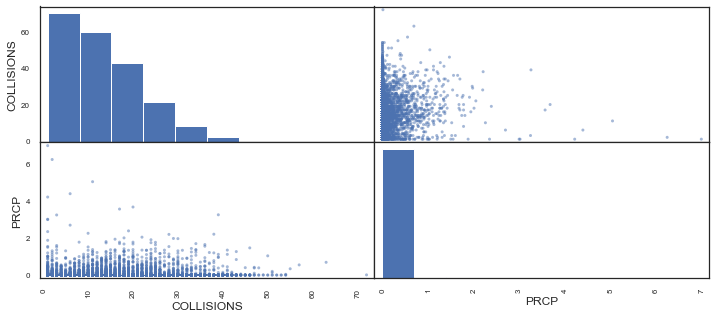

In [14]:
# see the relation between variables
fig = pd.plotting.scatter_matrix(weatherCrashDf[['DATE', 'WEATHER', 'COLLISIONS','PRCP','CITY']])
fig

<AxesSubplot:xlabel='PRCP', ylabel='COLLISIONS'>

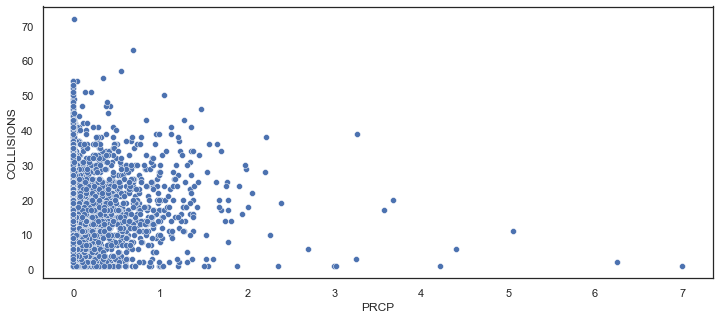

In [15]:
# collisions & precipitation
sns.scatterplot(x = 'PRCP', y = 'COLLISIONS', data = weatherCrashDf)

On the above graph, we can see that there's zero correlation between PRCP and COLLISIONS when we analyze the data for all cities

Let's take a look at distributions for PRCP and COLLISIONS

Text(0.5, 0, '')

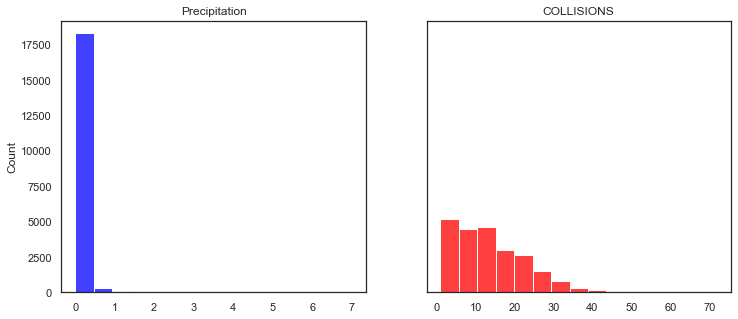

In [16]:
fig, (ax1,ax2) = plt.subplots(ncols = 2,sharey = True)
sns.histplot(weatherCrashDf['PRCP'],bins=15,ax=ax1,color='blue')
ax1.set_title('Precipitation')
ax1.set_xlabel('')

sns.histplot(weatherCrashDf['COLLISIONS'],bins=15, color = 'red')
ax2.set_title('COLLISIONS')
ax2.set_xlabel('')

We see that both distributions are severely skewed to the right. 

From the above plot we can estimate the range of our data that we should use in our analysis. </n>
PRCP(0,1), COLLISIONS(0,45) </n>
all other values deviate too much from the distribution. 

let's take a look how many outliers we have in PRCP and COLLISIONS:

In [44]:
print('COLLISIONS outliers:')
print(len(weatherCrashDf[weatherCrashDf['COLLISIONS']>45]))
print('PRCP outliers:')
print(len(weatherCrashDf[weatherCrashDf['PRCP']>1]))

COLLISIONS outliers:
39
PRCP outliers:
124


<AxesSubplot:xlabel='COLLISIONS', ylabel='PRCP'>

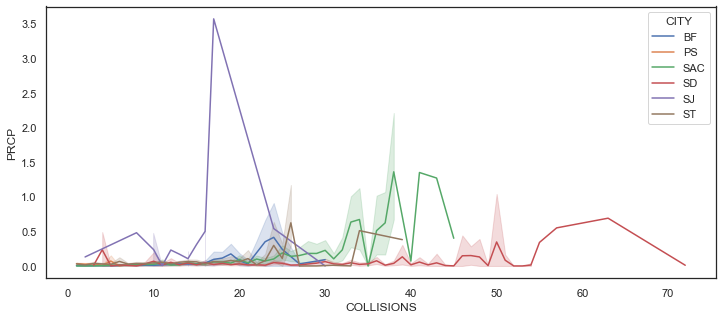

In [17]:
# collisons & precipitation by city
sns.lineplot(x = 'COLLISIONS', y = 'PRCP', hue = 'CITY',data = weatherCrashDf)

From the above plot, it's not clear if PRCP can affect COLLISIONS. let's take a look at relationship between them for each city separately. 

Text(0.5, 0, 'Collisions')

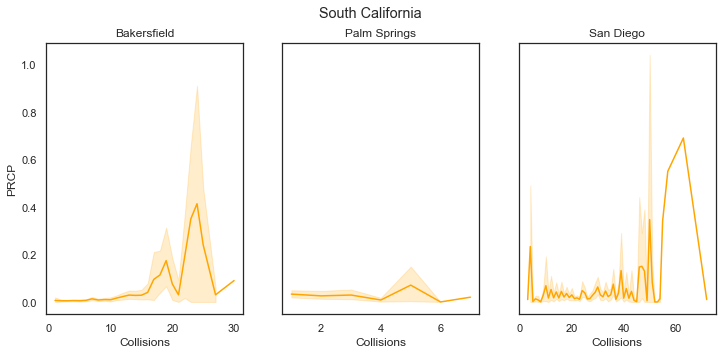

In [18]:
bf = weatherCrashDf[(weatherCrashDf['CITY']=='BF')]
ps = weatherCrashDf[(weatherCrashDf['CITY']=='PS')]
sac = weatherCrashDf[(weatherCrashDf['CITY']=='SAC')]
sd = weatherCrashDf[(weatherCrashDf['CITY']=='SD')]
sj = weatherCrashDf[(weatherCrashDf['CITY']=='SJ')]
st = weatherCrashDf[(weatherCrashDf['CITY']=='ST')]

fig, (ax1,ax2,ax3) = plt.subplots(ncols = 3,sharey = True)
fig.suptitle('South California')
sns.lineplot(x = 'COLLISIONS', y = 'PRCP',data = bf,ax=ax1, color = 'orange')
ax1.set_title('Bakersfield')
ax1.set_xlabel('Collisions')

sns.lineplot(x = 'COLLISIONS', y = 'PRCP',data = ps,ax=ax2, color = 'orange')
ax2.set_title('Palm Springs')
ax2.set_xlabel('Collisions')

sns.lineplot(x = 'COLLISIONS', y = 'PRCP',data = sd,ax=ax3, color = 'orange')
ax3.set_title('San Diego')
ax3.set_xlabel('Collisions')

We can see that in Bakersfield and San Diego there're more COLLISIONS when PRCP is higher. Palm Springs COLLISIONS are not affected by PRCP. 

Text(0.5, 0, 'collisions')

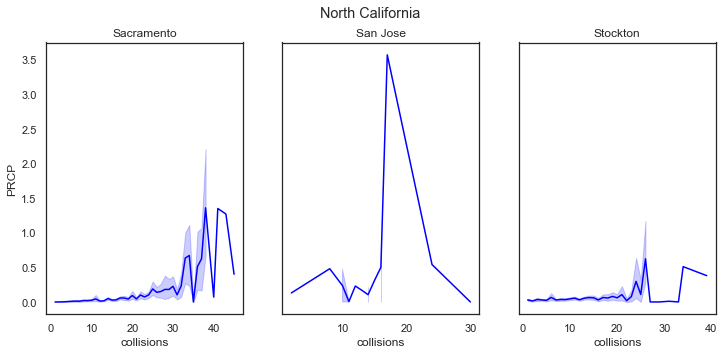

In [19]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols = 3,sharey = True)
fig.suptitle('North California')
sns.lineplot(x = 'COLLISIONS', y = 'PRCP',data = sac,ax=ax1, color = 'blue')
ax1.set_title('Sacramento')
ax1.set_xlabel('collisions')
sns.lineplot(x = 'COLLISIONS', y = 'PRCP',data = sj,ax=ax2, color = 'blue')
ax2.set_title('San Jose')
ax2.set_xlabel('collisions')
sns.lineplot(x = 'COLLISIONS', y = 'PRCP',data = st,ax=ax3, color = 'blue')
ax3.set_title('Stockton')
ax3.set_xlabel('collisions')

We can see that for Sacramento and San Jose there're more COLLISIONS when PRCP is higher. Stockton is almost not affected. 

[Text(0.5, 1.0, 'COLLISIONS DURING A WEEK')]

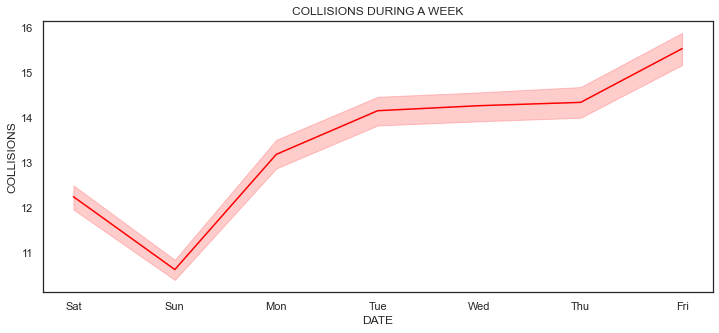

In [20]:
# analyze data by day of the week
#creating a dataframe copy with weekdays
wc = weatherCrashDf.copy(deep=True)
wc['DATE'] = pd.to_datetime(wc['DATE']).dt.strftime("%a")
wc

# collisions by day of the week
plt = sns.lineplot(x = 'DATE', y = 'COLLISIONS',data = wc, color = 'red').set(title='COLLISIONS DURING A WEEK')
plt

we can clearly see that in general COLLISIONS increase starting from Sunday to the end of the week

[Text(0.5, 1.0, 'COLLISIONS DURING A WEEK')]

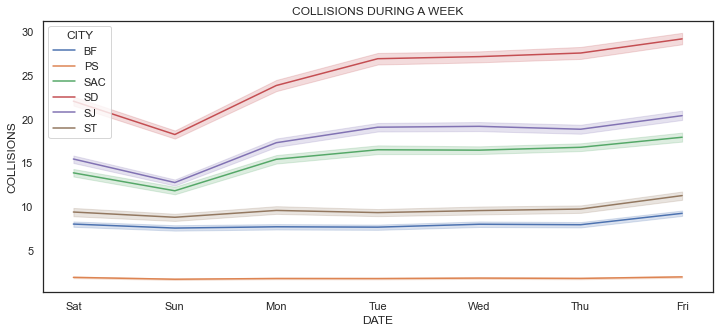

In [21]:
# collisions by day of the week by city
plt1 = sns.lineplot(x = 'DATE', y = 'COLLISIONS', hue = 'CITY',data = wc).set(title='COLLISIONS DURING A WEEK')
plt1

when we break down this plot by city, we see that only Sacramento, San Jose and San Diego follow this trend.
Day of the week doesn't affect COLLISIONS for Palm Springs, Bakersfield, and Stockton